In [1]:
import cv2
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
from random import shuffle

In [13]:
def show_error(data,r,t):
    fig = plt.figure(figsize = (20,5))
    plt.hist(np.concatenate(data).ravel(),bins=100,range=r);
    plt.axvline(x=np.mean(np.concatenate(data).ravel()), color='r');
    plt.title(t);

In [15]:
# sparse data distribution (sanity check)
base_path = '/ssd0/KITTI/'
disp_all = []
log_disp = []
with open('./filenames/eigen_train_files.txt') as f:
    lines = f.readlines()
    shuffle(lines)
    for i in range(len(lines)):
        im_path = lines[i].split(' ')[0]
        disp_path = im_path.replace('image_02/data', 'disp_0')
        disp = cv2.imread(base_path + disp_path)
        
        mask = disp > 0
        disp_all.append(disp[mask])
        log_disp.append(np.log(disp[mask]))
        if i == 1000:
            break

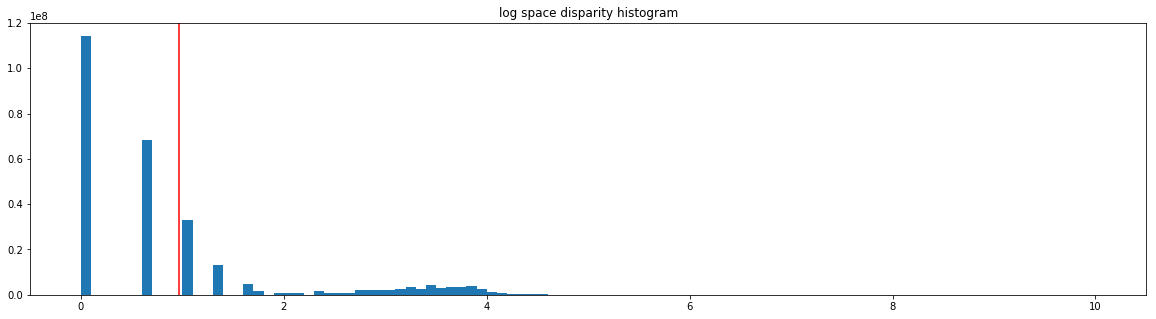

In [20]:
show_error(log_disp,(0,10),'log space disparity histogram')

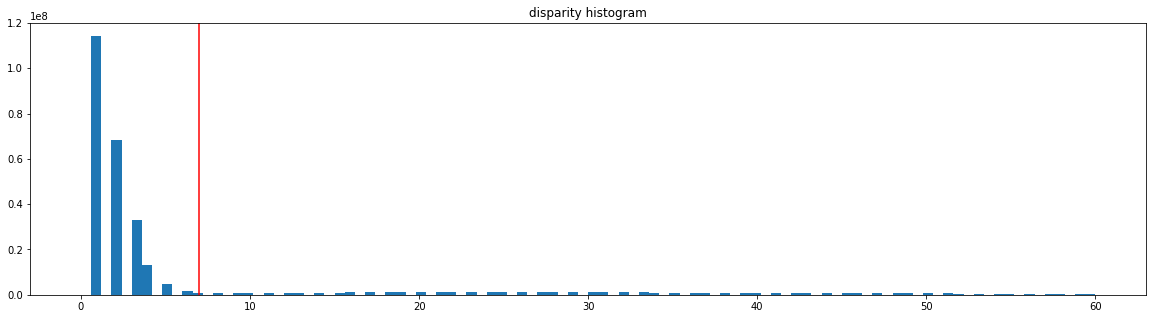

In [17]:
show_error(disp_all,(0,60),'disparity histogram')